# EDA on Alegria fire forest

By Andan M
GitHub: https://github.com/andanm 
LinkedIn: https://www.linkedin.com/in/andan-m-854bb824a/

Dataset link: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option("display.max_columns",500)

In [2]:
# Reading the dataset
df= pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df.iloc[121:].head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [3]:
#Droping the row which don't have any information and the header of SIDI-BEL ABBES REGION DATASET

df.drop(index=[122,123], inplace=True)
df.reset_index(inplace= True)
df.drop("index", axis=1, inplace= True)

df.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


In [4]:
# Creating a Region Column and adding 0 for Bejaia region and 1 for Sidi Bel-abbes region
df.loc[:122, 'Region']=0
df.loc[122:, 'Region']=1
df.iloc[163:].head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
163,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire,1.0
164,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,1.0
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0
166,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,1.0
167,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire,1.0


In [5]:
#Extracting the information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


Observation: By looking info, every columns datatype is object.

In [6]:
# Lets see the columns name
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [7]:
#In column names, some names are having unnecessary space, ie in 'RH', 'WS', lets strip the spaces
df.columns=[col_name.strip() for col_name in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
#Converting all the features to string for data claening.
df=df.astype('str')

In [9]:
# in some columns, features are having space lets remove those space
for feature in ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']:
    df[feature]=df[feature].str.replace(" ","")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [11]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,244,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,126,3,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,0.0
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,137,122


Information about the dataset
1. Data include 244 instance from both the region that are Bejaia region and Sidi Bel-abbes region
2. Two regions are having 122 each instances.
3. Dataset contain 11 attributes and 1 output column that is Classes.
4. The data is from the month June 2012 to Sept 2012


Attritube information.
1. Date: Day, Month and Year which is from June to September 2012
2. Temperature: Contains the Temperature value from 22 deg C to 42 deg C
3. RH(Relative Humidity): 21% to 90%
4. WS(Wind Speed): 6 to 29 KMPH
5. Rain : 0 to 16.8 Cms
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

In [12]:
for features in df.columns:
    print(df[features].unique())

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']
['06' '07' '08' '09']
['2012']
['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']
['18' '13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '26' '11' '10' '9'
 '8' '6' '29']
['0' '1.3' '13.1' '2.5' '0.2' '1.2' '0.5' '3.1' '0.7' '0.6' '0.3' '0.1'
 '0.4' '1' '1.4' '0.8' '16.8' '7.2' '10.1' '3.8' '0.9' '1.8' '4.6' '8.3'
 '5.8' '4' '2' '4.7' '8.7' '4.5' '1.1' '1.7' '2.2' '6' '1.9' '2.9' '4.1'
 '6.5' '4.4']
['65.7' '64.4' '47.1' '28.6' '64.8' '82.6' '88.2' '86.6' '52.9' '73.2'
 '8

In [13]:
df[df['FWI']=='fire'].index # finding the index in FWI which is having fire in the column

Int64Index([165], dtype='int64')

In [14]:
df.loc[165,'FWI']= '0.1' #Replacing the fire value with Floating number

In [15]:
df[df['Classes']=='nan'].index # Finidng the index in Classes which is having nan value

Int64Index([165], dtype='int64')

In [16]:
df.loc[165,'Classes']='fire' # Repalcing the nan value with fire

In [17]:
#Converting the datatypes from obejcts to int and float

datatype_convert={'day':'int64', 'month':'int64', 'year':'int64', 'Temperature': 'int64', 'RH':'int64', 'Ws':'int64', 'Rain':'float64', 'FFMC':'float64',
       'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'Region':'float64', 'FWI':'float64'}
df=df.astype(datatype_convert)
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region         float64
dtype: object

In [18]:
# Checking Null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Observation: There is no null value present in the dataset

In [19]:
# Numerical and Categorical Features
Cat_feature=[feature for feature in df.columns if df[feature].dtypes== 'O']

# Generating the Categorical features with region 
for feature in Cat_feature:
    print(df.groupby(feature)['Region'].value_counts())

Classes  Region
fire     1.0       79
         0.0       59
notfire  0.0       63
         1.0       43
Name: Region, dtype: int64


<AxesSubplot:xlabel='Classes', ylabel='count'>

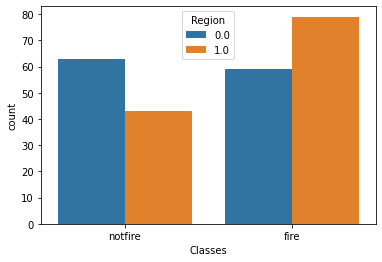

In [20]:
sns.countplot(data=df,x='Classes',hue='Region')

Obserbvation: By seeing the above graph, we can conclude fire has happened Sidi Bel-abbes region than Bejaia region.


In [21]:
#Getting a list of Numerical Features.
num_feature= [feature for feature in df.columns if df[feature].dtypes!="O"]
print(num_feature)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


In [22]:
# Getting a count of unique values in numerical features.
df[num_feature].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Region           2
dtype: int64

In [23]:
#Classifing the Discrete and Continous features that is if the features are less than 35 in length then it is Discrete otherwise it is Continuos


discrete_features=[feature for feature in num_feature if len(df[feature].unique())<35]
discrete_features

['day', 'month', 'year', 'Temperature', 'Ws', 'Region']

Discrete Features v/s Target Feature 

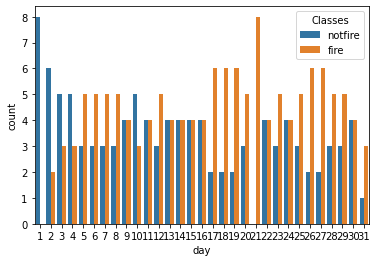

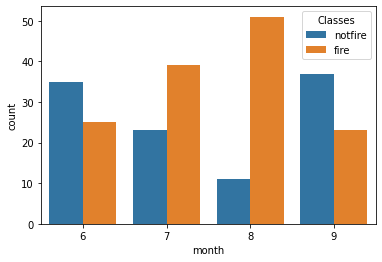

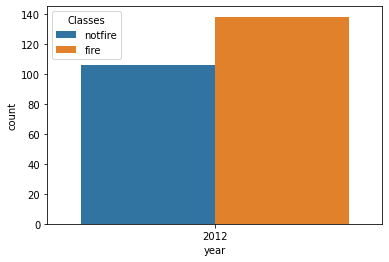

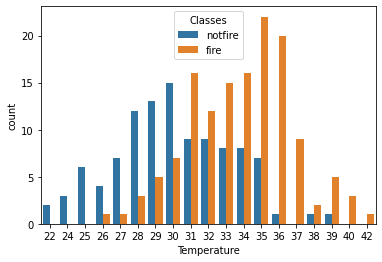

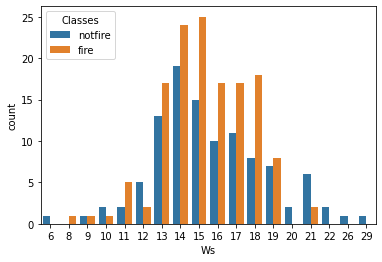

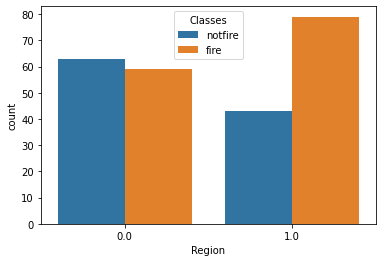

In [24]:
for feature in discrete_features:
    sns.countplot(data=df, x=feature, hue='Classes')
    plt.show()

Observations:
1. By day vs Classes, it is observed that almost everyday fire has occured.
2. By Month vs Classes, it observer that fire has occured more in July and August compare to June and September
3. By August month number od cases is more.
4. Fire Cases has occured more than the No Fire Cases.
5. By Temp vs Classes, it tells if the temp is between 31 deg to 37 deg, Fire cases are more
6. By WS vs Classes, it tells if the Wind speed is between 13 KMPH to 19 KMPH, Fire cases are more

In [25]:
#Generating Continuous Features

Continuous_feature=[feature for feature in num_feature if feature not in discrete_features]
Continuous_feature

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

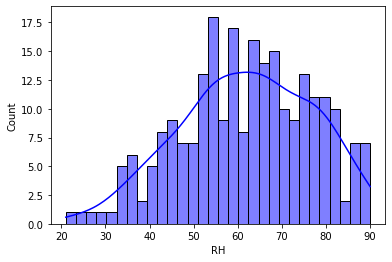

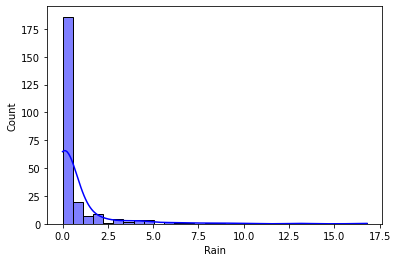

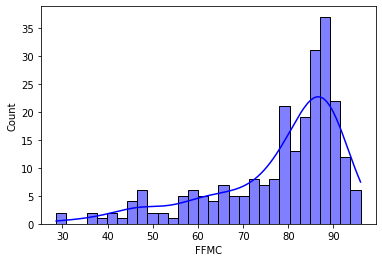

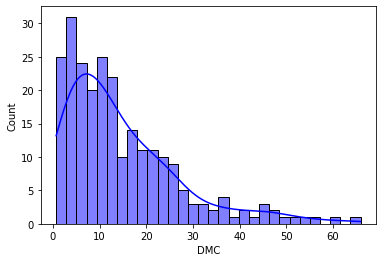

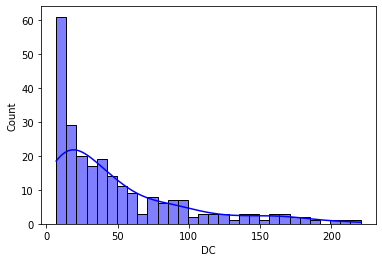

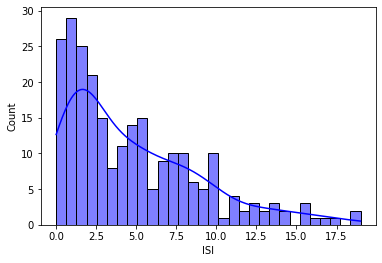

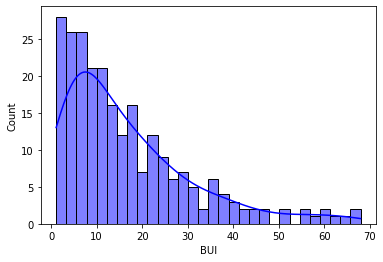

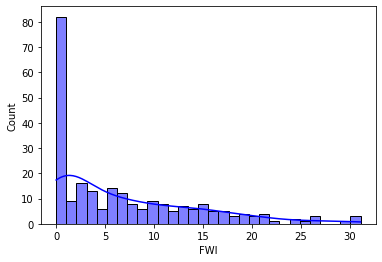

In [26]:
#Checking plots for Continuous features.

for feature in Continuous_feature:
    sns.histplot(data=df, x=feature, kde=True, bins=30, color='blue')
    plt.show() 

Observations:
 1. RH graph follows Gaussian Disturbion.
 2. FFMC graph follows left skewed distribution.
 3. Rain, DMC, DC, ISI, BUI, FWI are follows right skewed distribution(Log-Normal distribution).

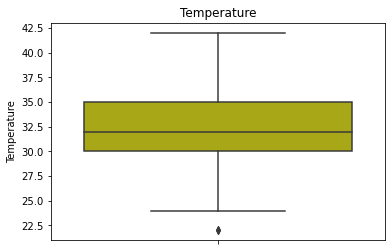

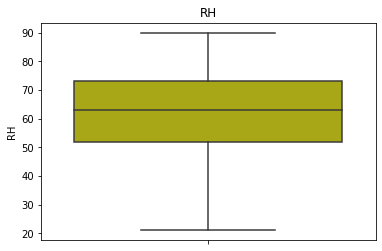

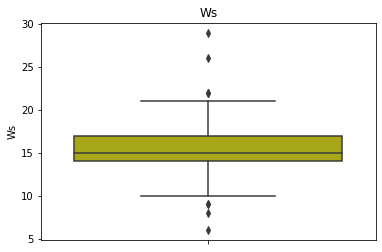

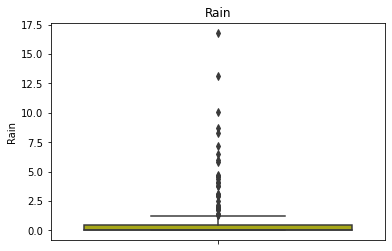

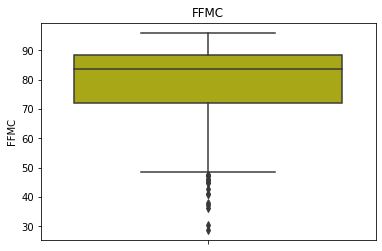

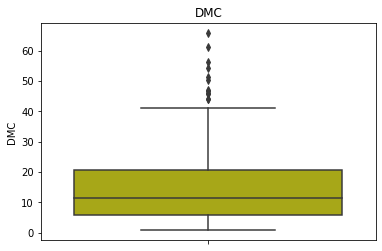

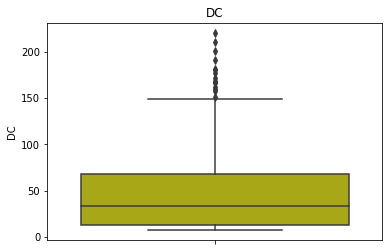

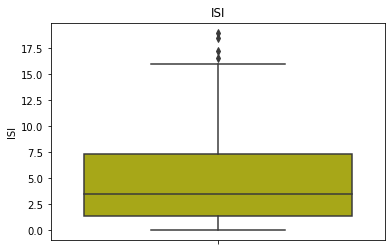

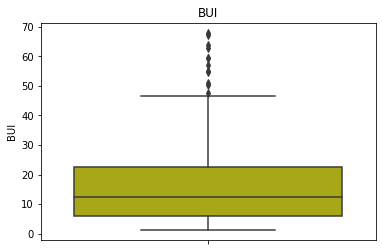

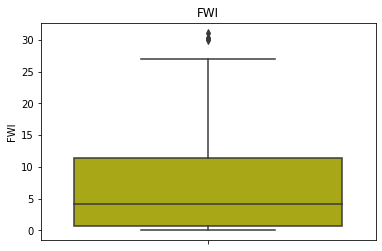

In [27]:
#Checking for Outliners.
#Excluding the features like Day, Month and Year for checking outliner.
for feature in [feature for feature in num_feature if feature not in ['day', 'month', 'year', 'Region']]:
    sns.boxplot(data=df, y=feature, color='y')
    plt.title(feature)
    plt.show()

Observations:
1. RH feature doesnt have outliers.
2. Temperature and FFMC have outliers in lower boundary side.
3. Ws has outliers on both upper and lower sides.
4. Rain, DMC,DC, ISI, BUI and FWI have outilers in upper boundary side.

In [30]:
#Correlation between each numerical data.
data= round(df[[feature for feature in num_feature if feature not in ['day', 'month', 'year', 'Region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00


<AxesSubplot:>

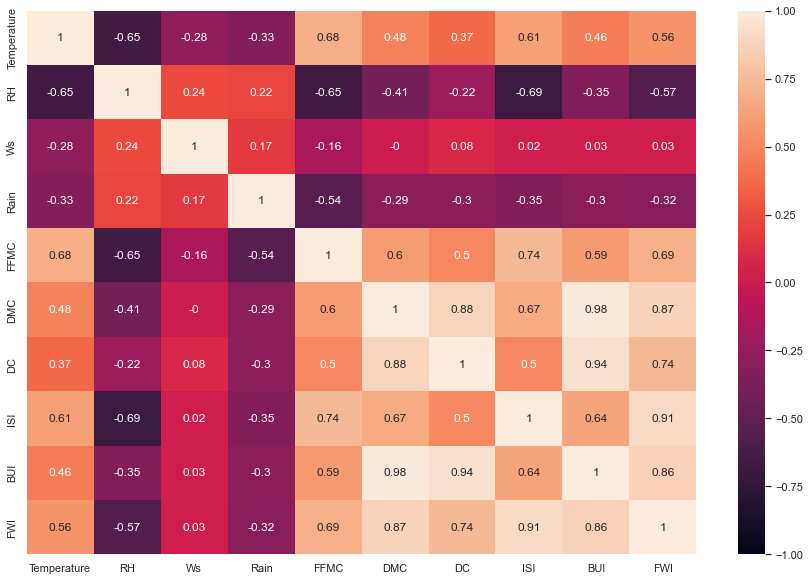

In [34]:
#Heat map for the visualizing correlated data.
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data,vmin=-1, vmax=1,annot=True)

Points to remember:
1. If Correlation coefficients between 0.9 and 1.0, very highly correlated.
2. If Correlation coefficients between 0.7 and 0.9, highly correlated.
3. If Correlation coefficients between 0.5 and 0.7, moderately correlated
4. If Correlation coefficients between 0.3 and 0.5, low correlated
5. If Correlation coefficients is less than 0.3, little correlated

Observations:
By seeing the heatmap, we can conclude that 
1. DC-BUI, DMC-BUI and ISI-FWI are very highly correalted.
2. ISI-FFMC, DMC-FMI, DMC-DC, DMC-FWI, BUI-FWI and DC-FWI are highly correalted.

# Final Report

1. There is no null value present in the dataset
2. No. of Fire cases had happened in Sidi Bel-abbes region than Bejaia region.
3. It observed that almost everyday fire has occured.
4. It observer that fire has occured more in July and August compare to June and September
5. By August month number of cases is more.
6. If the temp is between 31 deg to 37 deg, Fire cases are more that means in the hot area fire occured.
7. If the Wind speed is between 13 KMPH to 19 KMPH, Fire cases are more
8. RH feature doesnt have outliers.
9. Temperature and FFMC have outliers in lower boundary side.
10. Ws has outliers on both upper and lower sides.
11. Rain, DMC,DC, ISI, BUI and FWI have outilers in upper boundary side
12. DC-BUI, DMC-BUI and ISI-FWI are very highly correlated.
